<a href = 'https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html' style = 'font-size:30px'>Scipy Tutorial</a>

In [1]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt

# Index Trick

<code><b>numpy.mgrid</b></code> , <code><b>numpy.ogrid</b></code> , <code><b>numpy.r_ </b></code>, and <code><b>numpy.c_</b></code>, <code><b>np.ix_</b></code>for quickly constructing arrays.

## numpy.r_

In [7]:
#equivalent: np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
np.r_[3,[0]*5,-1:1:10j]

array([ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -1.        , -0.77777778, -0.55555556, -0.33333333,
       -0.11111111,  0.11111111,  0.33333333,  0.55555556,  0.77777778,
        1.        ])

## numpy.mgrid_

In [16]:
#equivalent: np.linspace(-1,1,5)
np.mgrid[-1:1:5j]

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [18]:
#meshgrid([0,1,2,3,4], [0,1,2,3,4])
np.mgrid[0:5, 0:5]

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

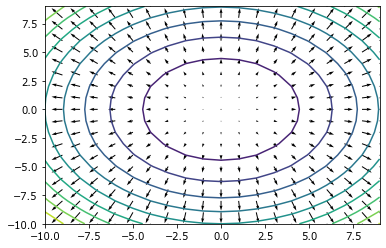

In [26]:
X, Y = np.mgrid[-10:10, -10:10]
Z = X * X + Y * Y

fig = plt.figure()
ax = fig.add_subplot()
ax.contour(X, Y, Z, levels = 10)
ax.quiver(X, Y, 2 * X, 2 * Y)
ax.contour?

## np.ogrid

save memory by taking advantage of broadcast rule

In [20]:
np.ogrid[0:5, 0:5]

[array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]])]

In [30]:
#Create a multiply table
X, Y = np.ogrid[1:10, 1:10]
Z = X * Y

Z

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 9, 18, 27, 36, 45, 54, 63, 72, 81]])

Approximate:

$$\int_{0}^1\int_{0}^1\int_{0}^1(a^b-c)dadbdc$$

In [7]:
def func(a, b, c):
    return np.power(a,b) - c
#summing over volume, for each cube
np.sum(func(*np.ogrid[0:1:101j, 0:1:101j, 0:1:101j]) * np.power(0.01, 3))

0.19690029940201878

## np.ix_(*arg)

uickly construct index arrays that will index
the cross product  
``a[np.ix_([1,3],[2,5])]`` returns the array
``[[a[1,2] a[1,5]], [a[3,2] a[3,5]]]``.

In [5]:
np.ix_([0,1], [2,3])

(array([[0],
        [1]]), array([[2, 3]]))

In [8]:
a = np.arange(36).reshape((6,6))
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [9]:
a[np.ix_([1,3], [2,5])]

array([[ 8, 11],
       [20, 23]])

# Shape Manipulation

In this category of functions are routines for squeezing out length- one dimensions from N-D arrays, ensuring that an array is at least 1-, 2-, or 3-D, and stacking (concatenating) arrays by rows, columns, and “pages” (in the third dimension). Routines for splitting arrays (roughly the opposite of stacking arrays) are also available.

# Polynomials

````python
np.poly
np.poly1d
np.polyadd
np.polyder
np.polydiv
np.polyfit
np.polyint
np.polymul
np.polynomial
np.polysub
np.polyval
```

In [1]:
from numpy import poly1d

```python
 poly1d(c_or_r, r=False, variable=None)
```

Create a function with roots: 1,1,2: f(x) = (x-1)(x-1)(x-2)

In [4]:
func = poly1d([1,1,2], r = True)
func

poly1d([ 1., -4.,  5., -2.])

Create a polynomial function: $x^2 - 3x + 2$

In [6]:
f = poly1d([1,-3,2])
print(f)

   2
1 x - 3 x + 2


In [7]:
#get the roots of polynomial
f.r

array([2., 1.])

In [8]:
#get the coefficents of polynomial
f.c

array([ 1, -3,  2])

In [10]:
#display the order of polynomial(the leading zero-coefficients are removed)
f.o

2

In [11]:
#evaluate at x = 2
f(2) #equivalent: np.polyval(f, 2), np.polyval([1,-3,2], 2)

0

In [54]:
#get the first derivative function of f
df = f.deriv() 
print(df) 

 
2 x - 3


In [55]:
#get the second derivative
df_2 = f.deriv(2) #np.polyder(f, ,m = 2), np.polyder([1,-3,2], m = 2) return an array of coefficents
print(df_2)

 
2


In [42]:
#calculate the first derivative at x = -1
df(-1)

-5

In [58]:
#get the first integral function of f
F = f.integ(m = 1, k = 10) #set constant C = 10
print(F) #equivalent: np.polyint(f, m = 1, k = 10)

        3       2
0.3333 x - 1.5 x + 2 x + 10


In [59]:
#get the second intergral function of f, C = 3
F_2 = f.integ(m = 2, k = 3)
print(F_2)

         4       3     2
0.08333 x - 0.5 x + 1 x + 3 x + 3


In [50]:
#evaluate integral from 1 to 10
F(10) - F(1)

202.49999999999994

The other way to handle polynomials is as an array of coefficients with the first element of the array giving the coefficient of the highest power. There are explicit functions to add, subtract, multiply, divide, integrate, differentiate, and evaluate polynomials represented as sequences of coefficients.

In [60]:
f1 = poly1d([3, -2])
print(f1)

 
3 x - 2


In [63]:
#add 2 functions
f_add = f + f1 #equivalent: np.polyadd(f ,f1)
print(f_add)

   2
1 x


In [18]:
#given root, finding coefficents of polynomial
np.poly([1,1,3]) # f(x) = (x - 1)(x - 1)(x - 3) = x^3 - 5x^2 + 7x -3

array([ 1., -5.,  7., -3.])

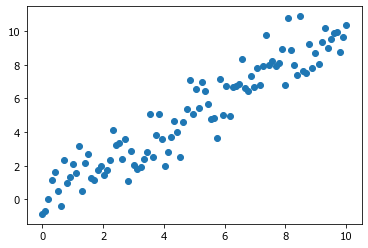

In [25]:
x = np.linspace(0, 10, 100)
y = x + np.random.normal(size = 100) 
plt.scatter(x,y)

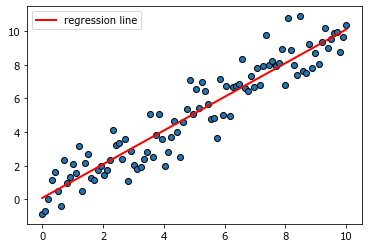

In [32]:
coef_, intercept_ = np.polyfit(x,y, deg = 1)
plt.scatter(x,y, ec = 'k')
plt.plot(x, coef_ * x + intercept_, '-r', lw = 2, label = 'regression line')
plt.legend()

# Vectorize

In [66]:
#get the max element-wise
a = np.array([1,2,3])
b = np.array([3,-1, 2])
max_vec = np.vectorize(max)
max_vec(a,b)

array([3, 2, 3])

In [64]:
#Leaky Relu
def LeakyRelu(z, alpha = 1e-3):
    return np.vectorize(max)(z, alpha * z)

# Type Handling

check element-wise are real / complex:

In [67]:
ndarray = np.array([1, 3, 2 + 5j, 3, 7 + 3j, 3 + 2j])
ndarray

array([1.+0.j, 3.+0.j, 2.+5.j, 3.+0.j, 7.+3.j, 3.+2.j])

In [69]:
#check element-wise real number
np.isreal(ndarray)

array([ True,  True, False,  True, False, False])

In [70]:
#check element-wise complex number
np.iscomplex(ndarray)

array([False, False,  True, False,  True,  True])

In [72]:
#check if the object is real
num = ndarray[2]
np.isrealobj(num)

False

In [73]:
#check if the object is complex
np.iscomplexobj(num)

True

In [74]:
#get the real part
np.real(ndarray)

array([1., 3., 2., 3., 7., 3.])

In [75]:
#get the imaginary part
np.imag(ndarray)

array([0., 0., 5., 0., 3., 2.])

Occasionally the need to check whether or not a number is a scalar (Python (long)int, Python float, Python complex, or rank-0 array) occurs in coding. This functionality is provided in the convenient function <code><b>numpy.isscalar</b></code> which returns a 1 or a 0.

In [76]:
np.isscalar(3)

True

In [77]:
np.isscalar((3,7))

False

# Other useful functions

```python
np.select(condlist, choicelist, default=0)
--------------------------------------------------
default : scalar, optional
    The element inserted in `output` when all conditions evaluate to False.
```

In [81]:
x = np.arange(10)
condlist = [x<3, x>5]
choicelist = [x, x**2]
np.select(condlist, choicelist)

array([ 0,  1,  2,  0,  0,  0, 36, 49, 64, 81])

In [82]:
#clip values between 1 and 10
np.random.seed(101)
arr = np.random.randint(-10, 20, 15)
arr

array([ 1,  7, -4, 13, 19,  1,  5, -1,  3, -2, -6, -2, 11, 18, 18])

In [83]:
np.select([arr < 1, (1 <= arr) & (arr <= 10), arr > 10], [1, arr, 10])

array([ 1,  7,  1, 10, 10,  1,  5,  1,  3,  1,  1,  1, 10, 10, 10])